In [3]:
# "Hands-On Machine Learning with Scikit-Learn & TensorFlow"
# Chapter 5 - Support Vector Machines
# Chris Simons
# 31 October 2019

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [9]:
datasets?

In [4]:
# load iris dataset

iris = datasets.load_iris( )
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

predicting 5.5, 1.4


array([0.])

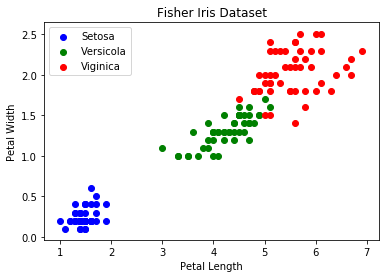

In [6]:
# Before we classify, let's have a look at the data

import matplotlib.pyplot as plt

x = iris[ "data" ][ :, (2, 3) ] # petal length, petal width
y = (iris[ "target" ] == 2 ).astype( np.float64 ) # Iris Virginia

# print( x )
# print( y )

# look at the data in a scatter plot
# plt.scatter( x[ :, ( 0 ) ], x[ :, ( 1 ) ] )
# plt.plot( )

# look at the data by species in a scatter plot
i = 0
j = len(iris[ "data" ] )
a, b, c, d, e, f = [ ], [ ], [ ], [ ], [ ], [ ]

for i in range( j ):
    if( iris[ "target" ][ i ] == 0 ):
        a.append( iris[ "data" ][ i, ( 2 ) ] ) # petal length
        b.append( iris[ "data" ][ i, ( 3 ) ] ) # petal width
    elif( iris[ "target" ][ i ] == 1 ):
        c.append( iris[ "data" ][ i, ( 2 ) ] )
        d.append( iris[ "data" ][ i, ( 3 ) ] )        
    else:
        e.append( iris[ "data" ][ i, ( 2 ) ] )
        f.append( iris[ "data" ][ i, ( 3 ) ] )

plt.scatter( a, b, color = "blue", label = "Setosa" ) # Iris Setosa
plt.scatter( c, d, color = "green", label = "Versicola" ) # Iris Versicola
plt.scatter( e, f, color = "red", label = "Viginica" ) # Iris Virginica
plt.xlabel( "Petal Length" )
plt.ylabel( "Petal Width" )
plt.title( "Fisher Iris Dataset" )
plt.legend( loc = 'upper left' )
plt.plot( )
        
# use a Linear SVM model to classify whether the species is Virginica or not

svm_clf = Pipeline( (
        ( "scaler", StandardScaler( ) ),
        ( "linear_svc", LinearSVC( C = 1 , loss = "hinge" ) ),
    ))

svm_clf.fit( x, y )

# test some values
#print( "predicting 5.5, 1.7")
#svm_clf.predict( [ [ 5.5, 1.7 ] ] ) # output is 1

#print( "predicting 5.5, 1.6")
#svm_clf.predict( [ [ 5.5, 1.6 ] ] ) # output is 1

#print( "predicting 5.5, 1.5")
#svm_clf.predict( [ [ 5.5, 1.4 ] ] ) # output is 1

print( "predicting 5.5, 1.4")
svm_clf.predict( [ [ 5.5, 1.4 ] ] ) # output is 0


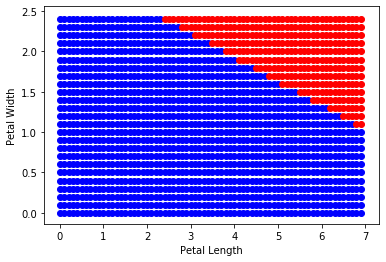

In [4]:
# to show the linear separation

x, y 
a, b, c, d = [ ], [ ], [ ], [ ]

for i in range( 0, 70 ):
    for j in range( 0, 25 ):
        x = i * 0.1
        y = j * 0.1
        holder = svm_clf.predict( [ [ x, y ] ] )
        if( holder[ 0 ] == 0 ):
            a.append( x )
            b.append( y )
        else:
            c.append( x )
            d.append( y )

plt.scatter( a, b, color = "blue" )
plt.scatter( c, d, color = "red" ) # Virginica
plt.xlabel( "Petal Length" )
plt.ylabel( "Petal Width" )
plt.show( )

In [5]:
# load moons dataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

moons = make_moons( )
moons

(array([[-6.72300890e-01,  7.40277997e-01],
        [ 4.81607432e-01, -3.55142763e-01],
        [-6.23489802e-01,  7.81831482e-01],
        [ 3.76510198e-01, -2.81831482e-01],
        [-8.01413622e-01,  5.98110530e-01],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 9.97945393e-01,  6.40702200e-02],
        [ 1.99794539e+00,  4.35929780e-01],
        [ 1.57211666e+00, -3.20172255e-01],
        [ 4.62538290e-01,  8.86599306e-01],
        [ 9.26916757e-01,  3.75267005e-01],
        [ 3.20515776e-02,  9.99486216e-01],
        [ 1.22252093e+00, -4.74927912e-01],
        [-2.84527587e-01,  9.58667853e-01],
        [ 1.67230089e+00, -2.40277997e-01],
        [ 3.27699110e-01, -2.40277997e-01],
        [ 7.77479066e-01, -4.74927912e-01],
        [ 4.04783343e-01,  9.14412623e-01],
        [ 6.54634946e-01, -4.38468422e-01],
        [-7.18349350e-01,  6.95682551e-01],
        [ 5.95216657e-01, -4.14412623e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [ 2.84527587e-01,  9.586

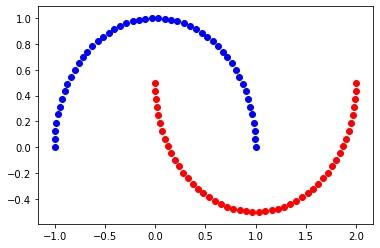

In [6]:
# extract the 'x' and 'y' values and plot the two moons

length = len( moons[ 0 ] )
# print( length )

a, b, c, d = [ ], [ ], [ ], [ ]

for i in range( length ):
    if moons[ 1 ][ i ]  == 0:
        a.append( moons[ 0 ][ i, ( 0 ) ] )
        b.append( moons[ 0 ][ i, ( 1 ) ] )
    else:
        c.append( moons[ 0 ][ i, ( 0 ) ] )
        d.append( moons[ 0 ][ i, ( 1 ) ] )

plt.scatter( a, b, color = "blue" )
plt.scatter( c, d, color = "red" )
plt.show( )

In [13]:
x = moons[ 0 ][ :, (0, 1 ) ]
print( len( x ) )
y = moons[ 1 ][ : ]
print( len( y ) )

# plt.scatter( x[ :,(0 ) ], x[ :, (1) ] )
# plt.show( )

# use a PolynomialFeatures SVM model to classify the moon of 
# an x, y datapoint in a nonlinear dataset 

polynomial_svm_clf = Pipeline( ( 
        ( "poly_features", PolynomialFeatures( degree = 3 ) ),
        ( "scaler", StandardScaler( ) ),
        ( "svm_clf", LinearSVC( C = 10, loss = "hinge" ) )
    ))

polynomial_svm_clf.fit( x, y )

polynomial_svm_clf.predict( [ [ 0.5, 0.4 ] ] )

#just to show that the polynomial pipeline isn't squaring (as in the book) 
#plt.scatter( (x[ :,(0 ) ])**2, (x[ :, (1) ])**2 )
#plt.show( )



100
100


C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0], dtype=int64)

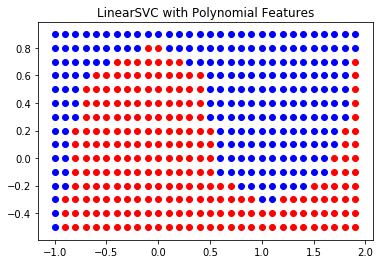

In [18]:
# to show the nonlinear distributions
# using a LinearSVC but with PolynomialFeatures

x_coord1, y_coord1 = 0.0, 0.0
a1, b1, c1, d1 = [ ], [ ], [ ], [ ]

for i in range( -10, 20 ):
    for j in range( -5, 10 ):
        x_coord1 = i * 0.1
        y_coord1 = j * 0.1
        holder = polynomial_svm_clf.predict( [ [ x_coord1, y_coord1 ] ] )
        if( holder[ 0 ] == 0 ):
            a1.append( x_coord1 )
            b1.append( y_coord1 )
        else:
            c1.append( x_coord1 )
            d1.append( y_coord1 )

plt.scatter( a1, b1, color = "blue" )
plt.scatter( c1, d1, color = "red" )
plt.title( "LinearSVC with Polynomial Features" )
plt.show( )

In [15]:
x = moons[ 0 ][ :, (0, 1 ) ]
print( len( x ) )
y = moons[ 1 ][ : ]
print( len( y ) )

# plt.scatter( x[ :,(0 ) ], x[ :, (1) ] )
# plt.show( )

# use a PolynomialKernel SVM model to classify the moon of 
# an x, y datapoint in a nonlinear dataset 

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline( ( 
        ( "poly_features", PolynomialFeatures( degree = 3 ) ),
        ( "scaler", StandardScaler( ) ),
        ( "svm_clf", SVC( kernel = "poly", degree = 3, coef0 = 1, C = 5 ) )
    ))

poly_kernel_svm_clf.fit( x, y )

poly_kernel_svm_clf.predict( [ [ 0.5, 0.4 ] ] )

100
100


C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1], dtype=int64)

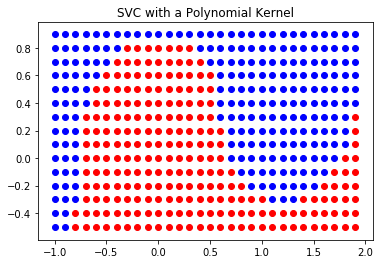

In [17]:
# to show the nonlinear distributions
# using an SVC with a polynomial kernel

x_coord2, y_coord2 = 0.0, 0.0
a2, b2, c2, d2 = [ ], [ ], [ ], [ ]

for i in range( -10, 20 ):
    for j in range( -5, 10 ):
        x_coord2 = i * 0.1
        y_coord2 = j * 0.1
        holder = poly_kernel_svm_clf.predict( [ [ x_coord2, y_coord2 ] ] )
        if( holder[ 0 ] == 0 ):
            a2.append( x_coord2 )
            b2.append( y_coord2 )
        else:
            c2.append( x_coord2 )
            d2.append( y_coord2 )

plt.scatter( a2, b2, color = "blue" )
plt.scatter( c2, d2, color = "red" )
plt.title( "SVC with a Polynomial Kernel" )
plt.show( )

In [16]:
# use a Gaussian Radial Basis Function (RBF) Kernal

rbf_kernel_svm_clf = Pipeline( ( 
        ( "scaler", StandardScaler( ) ),
        ( "svm_clf", SVC( kernel = "rbf", gamma = 5, C = 0.001 ) )
    ))

rbf_kernel_svm_clf.fit( x, y )

rbf_kernel_svm_clf.predict( [ [ 0.5, 0.4 ] ] )

array([0], dtype=int64)

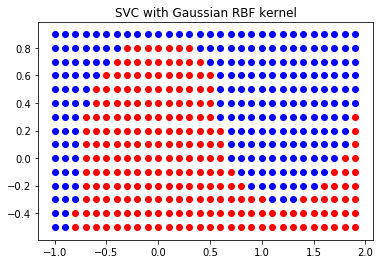

In [20]:
# to show the nonlinear distributions
# using an SVC with Gaussian RBF kernel

x_coord3, y_coord3 = 0.0, 0.0
a3, b3, c3, d3 = [ ], [ ], [ ], [ ]

for i in range( -10, 20 ):
    for j in range( -5, 10 ):
        x_coord3 = i * 0.1
        y_coord3 = j * 0.1
        holder = poly_kernel_svm_clf.predict( [ [ x_coord3, y_coord3 ] ] )
        if( holder[ 0 ] == 0 ):
            a3.append( x_coord3 )
            b3.append( y_coord3 )
        else:
            c3.append( x_coord3 )
            d3.append( y_coord3 )

plt.scatter( a3, b3, color = "blue" )
plt.scatter( c3, d3, color = "red" )
plt.title( "SVC with Gaussian RBF kernel" )
plt.show( )